# Comparison of Numerical to Analytical Solution of the Acoustic Wave Equation

This interactive file walks through the process of forming a numerical simulation of the acoustic wave equation from scratch

## Importing libraries and files

In [1]:
from functions import *
from pressure import *
import matplotlib
import numpy as np
matplotlib.use("nbagg")

import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

## Initializing parameters

In [2]:
xsize = 10000              # Size of x axis (m)
xSteps   = 10000              # Number of x axis grid points
dx   = xsize/(xSteps-1)        # Size of discrete position step
WaveSpeed   = 334.        # Speed of wave (m/s)
SourcePos = int(xSteps/2)          # location of source on the x axis
SourceReceiverPos   = SourcePos + 100         # Location of receiver in grid
TimeSteps   = 1001        # Number of time steps
dt   = 0.0010             # Size of discrete time unit
xpos    = np.arange(xSteps)      # X axis grid
xpos    = xpos*dx
c    = np.zeros(xSteps)       # Wave speed
c    = c + WaveSpeed      

SourceFreq   = 25.       # Main frequency of source
Shift   = 4. / SourceFreq # Shift of the source time

## Generating the source function (derivative of Gaussian)

In [3]:
Source = gaussianderivative(SourceFreq, TimeSteps, dt) # Initializes source parameters
SourceFunc,Time,Shift = Source.returnfunction() # Returns the discrete source function, its time axis, and respective shift

<IPython.core.display.Javascript object>


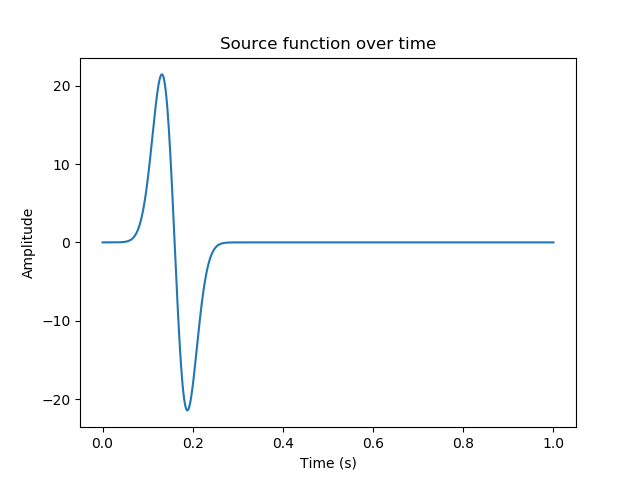

In [4]:
plt.figure(0) # Plotting the source function over time
plt.plot(Time,SourceFunc)
plt.ylabel("Amplitude")
plt.xlabel("Time (s)")
plt.title("Source function over time")
plt.show()

<IPython.core.display.Javascript object>


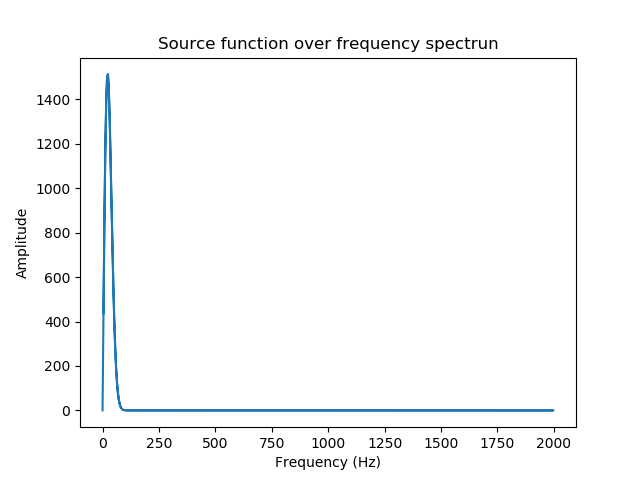

In [5]:
FreqSpectrum = np.fft.fft(SourceFunc) # Fast Fourier transform to go to frequency domain
TimeSpectrum = np.fft.fftfreq(FreqSpectrum.size, d = dt / 4.) # Translation of time domain to frequency domain

plt.figure(1) # Plotting the source function's frequency spectrum
plt.plot(np.abs(TimeSpectrum), np.abs(FreqSpectrum))
plt.ylabel("Amplitude")
plt.xlabel("Frequency (Hz)")
plt.title("Source function over frequency spectrun")
plt.show()

## Generating the analytical solution (Gaussian)

In [5]:
Analytic = gaussian(SourceFreq,TimeSteps,dt,SourceFunc,SourceReceiverPos,SourcePos,WaveSpeed,dx,xpos)
AnalyticFunc, lim = Analytic.returnfunction()

## Simulation of acoustic wave

In [6]:
DynamicPressure = pressure(xSteps,dx,dt,c)

<IPython.core.display.Javascript object>


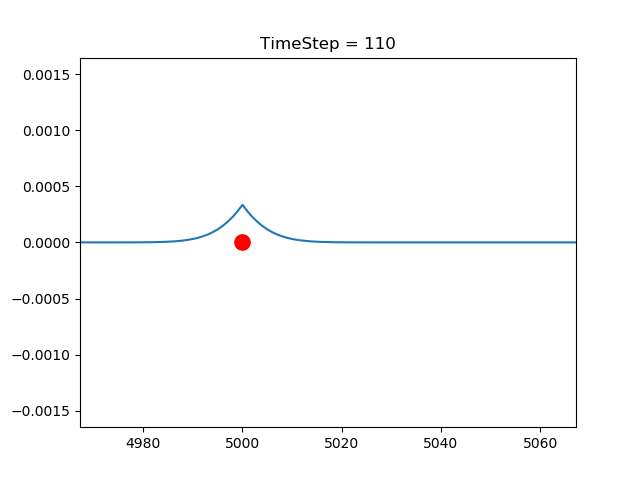

In [7]:
plt.figure(2)
plt.ion()


SourcePosPlot,= plt.plot(SourcePos, 0, 'ro', markersize=11) 
PressurePlot,= plt.plot(DynamicPressure.Pressure) 
plt.xlim(0, xsize)
plt.ylim(-np.max(DynamicPressure.Pressure), np.max(DynamicPressure.Pressure))


plt.show()

In [9]:
for TimeStep in range(TimeSteps):


    for i in range(1, xSteps - 1):
        DynamicPressure.PressureSecDer[i] = (DynamicPressure.Pressure[i + 1] - 2 * DynamicPressure.Pressure[i] + DynamicPressure.Pressure[i - 1]) / (dx ** 2)



    DynamicPressure.PressureNew = 2 * DynamicPressure.Pressure - DynamicPressure.PressureOld + (c ** 2) * (dt ** 2) * DynamicPressure.PressureSecDer

    DynamicPressure.PressureNew[SourcePos] = DynamicPressure.PressureNew[SourcePos] + SourceFunc[TimeStep] / (dx) * (dt ** 2)
    
            

    DynamicPressure.PressureOld, DynamicPressure.Pressure = DynamicPressure.Pressure, DynamicPressure.PressureNew
    
    
    DisplayFreq = 5
    if (TimeStep % DisplayFreq) == 0:
        plt.title('TimeStep = %d' % TimeStep)
        plt.ylim(-1.1*np.max(abs(DynamicPressure.Pressure)), 1.1*np.max(abs(DynamicPressure.Pressure)))

        xshift=20;window=50
        plt.xlim(SourcePos*dx+WaveSpeed*TimeStep*dt-window*dx-xshift, SourcePos*dx+WaveSpeed*TimeStep*dt+window*dx-xshift)
        PressurePlot.set_ydata(DynamicPressure.Pressure)
        plt.gcf().canvas.draw()

KeyboardInterrupt: 

## Comparison of simulation to analytical solution

In [10]:
DynamicPressure = pressure(xSteps,dx,dt,c)

<IPython.core.display.Javascript object>


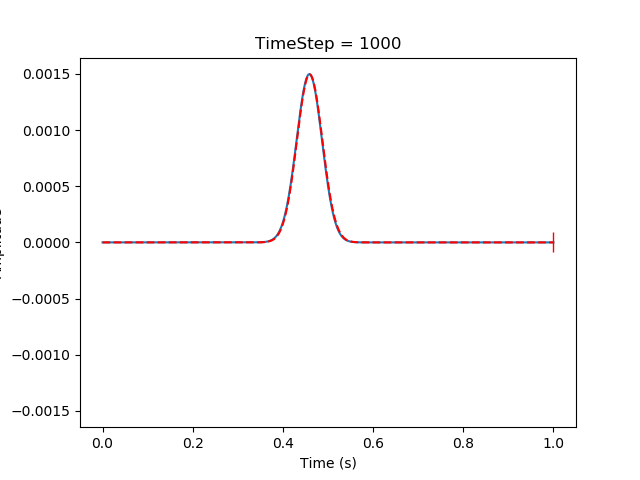

In [11]:
plt.figure(3)

Seismogram = np.zeros(TimeSteps)


#AnalyticMarkerPlot,= plt.plot(0,0,'r--',markersize=1)
#NumericMarkerPlot,= plt.plot(0,0,'b-',markersize=1)
SeismogramPlot,= plt.plot(Time, Seismogram)
TimePos,= plt.plot([0], [0], 'r|', markersize=15)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.plot(Time,AnalyticFunc,'r--')
plt.show()

In [12]:
for TimeStep in range(TimeSteps):

    for i in range(1, xSteps - 1):
        DynamicPressure.PressureSecDer[i] = (DynamicPressure.Pressure[i + 1] - 2 * DynamicPressure.Pressure[i] + DynamicPressure.Pressure[i - 1]) / (dx ** 2)


    DynamicPressure.PressureNew = 2 * DynamicPressure.Pressure - DynamicPressure.PressureOld + (c ** 2) * (dt ** 2) * DynamicPressure.PressureSecDer

    DynamicPressure.PressureNew[SourcePos] = DynamicPressure.PressureNew[SourcePos] + SourceFunc[TimeStep] / (dx) * ((dt) ** 2)
    

    DynamicPressure.PressureOld, DynamicPressure.Pressure = DynamicPressure.Pressure, DynamicPressure.PressureNew
    
    
    Seismogram[TimeStep] = DynamicPressure.Pressure[SourceReceiverPos]
    

    DisplayFreq = 5
    if (TimeStep % DisplayFreq) == 0:
        plt.title('TimeStep = %d' % TimeStep)
        plt.ylim(-1.1*np.max(abs(DynamicPressure.Pressure)), 1.1*np.max(abs(DynamicPressure.Pressure)))
        # plot around propagating wave
        xshift=20;window=50
        SeismogramPlot.set_ydata(Seismogram)
        TimePos.set_data(Time[TimeStep], Seismogram[TimeStep])
        plt.gcf().canvas.draw()